## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scraper import Scraper

## Creating instance of Scraper object and getting scraped data

In [3]:
"""
Scraper(car_type, num_pages)
- car_type is one of the strings: "sedan", "suv", "coupe" or "convertible"

- num_pages is the number of pages to get the data from, by default it parses throught the data
of all the pages but the user can specifiy a smaller number of pages as the Scraper will take
the minimum of the the total number of pages on the website and num_pages
"""
my_scraper = Scraper('sedan', 18)
data_dict = my_scraper.get_data_dict()

df = pd.DataFrame(data_dict)
columns = ['Name', 'Seats', 'Length', 'Height', 'Horsepower', 'Torque', 'Wheelbase', 
			'Trunk_volume', 'Curb_Weight', 'Price']
df.columns = columns

imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.iloc[0:, 1:]))
df_imputed.columns = ['Seats', 'Length', 'Height', 'Horsepower', 'Torque', 'Wheelbase', 
			'Trunk_volume', 'Curb_Weight', 'Price']
df_imputed

x = df_imputed[['Seats', 'Length', 'Height', 'Horsepower','Torque', 'Wheelbase', 'Trunk_volume', 'Curb_Weight']]

y = df_imputed[['Price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.85, test_size = 0.15)

model = LinearRegression().fit(x_train, y_train)

y_predict= model.predict(x_test)

print("Train score:")
print(model.score(x_train, y_train))

print("Test score:")
print(model.score(x_test, y_test))

## Line of Best Fit

[[-2.68326309e+02  1.01222942e+03  5.86143971e+03  2.47995008e+01
   2.04484562e+02  6.64832480e+02  2.50856936e+02 -2.73548995e+00]]


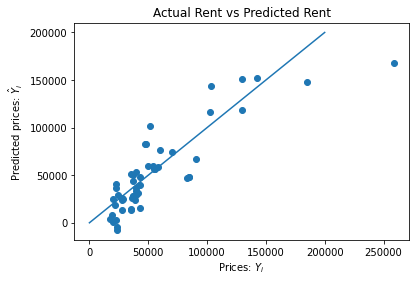

In [6]:
plt.scatter(y_test, y_predict)
plt.plot(range(200000), range(200000))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

print(model.coef_)

plt.show()

## Distribution and Spread of Price

C:\Users\amaan\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


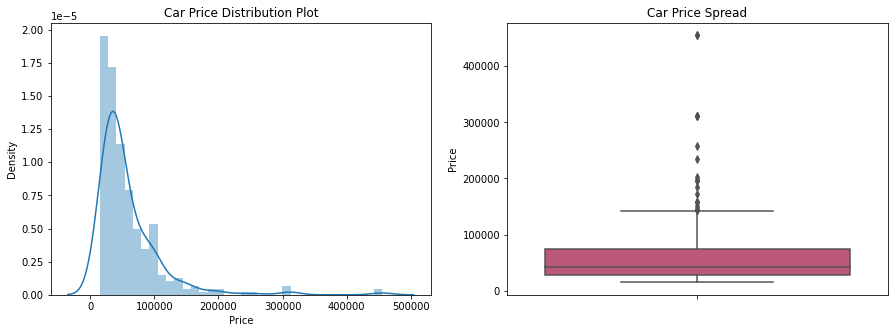

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df_imputed.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df_imputed.Price, palette=("plasma"))

plt.show()

## Correlation Graphs of 4 features with the highest correlation coefficients

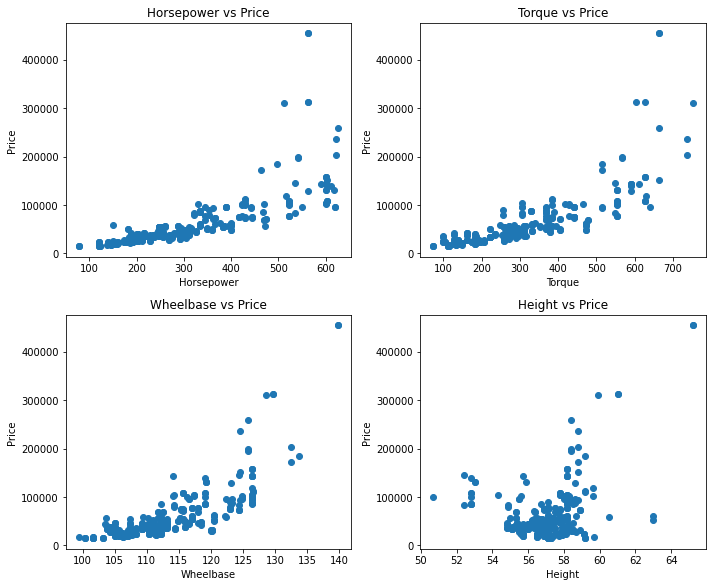

In [8]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df_imputed[x],df_imputed['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Horsepower', 1)
scatter('Torque', 2)
scatter('Wheelbase', 3)
scatter('Height', 4)

plt.tight_layout()

## Heatmap of all features

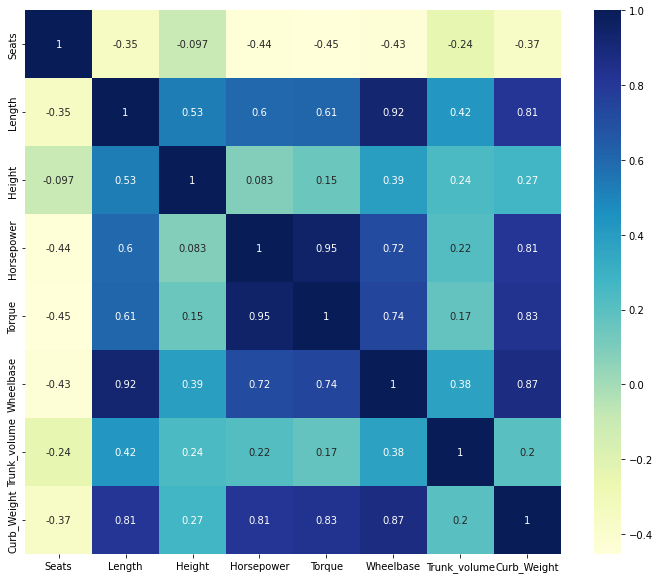

In [9]:
plt.figure(figsize = (12, 10))
sns.heatmap(x_train.corr(), annot = True, cmap="YlGnBu")
plt.show()